In [1]:
# Libraries Imported.
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import plotly.express as px
import warnings

In [2]:
df = sns.load_dataset('iris') # Loading in Dataset

In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#Creating a function
def bar_label(ax):
    for i in ax.patches: # Looping through each bar in the barplot.
        # Using the .annotate element to add text to the graph. 
        ax.annotate(format(i.get_height(), '.2f'), # Getting the height to 2 decimal places. .get_height will return the height of the bar. This is done for all bars in the graph as its a for loop.
                    # .get_x will return the x-coordinate of the left hand side of each bar/ .get_width returns the width of the bar.
                    # First getting the x-cord of the left hand side and adding the width. Then dividing by 2 to centre where the text should be.
                       (i.get_x() + i.get_width() / 2., i.get_height()), # get_height is used to denote where on the Y axis the text should be
                       ha = 'center', va = 'center', # Aligning the text to be horizontally and vertically centred.
                       size=18, # Denoting the font size of the text to be 18.
                       # Setting the coordinates of the text on the x axis to be 0, as I am happy with the text being centred.
                       xytext = (0, -14),  # Setting the coordinates of text on the y axis to be -14, as I would like the text to be just below the top of the bar.
                       textcoords = 'offset points') # Offsetting the text from reference points.

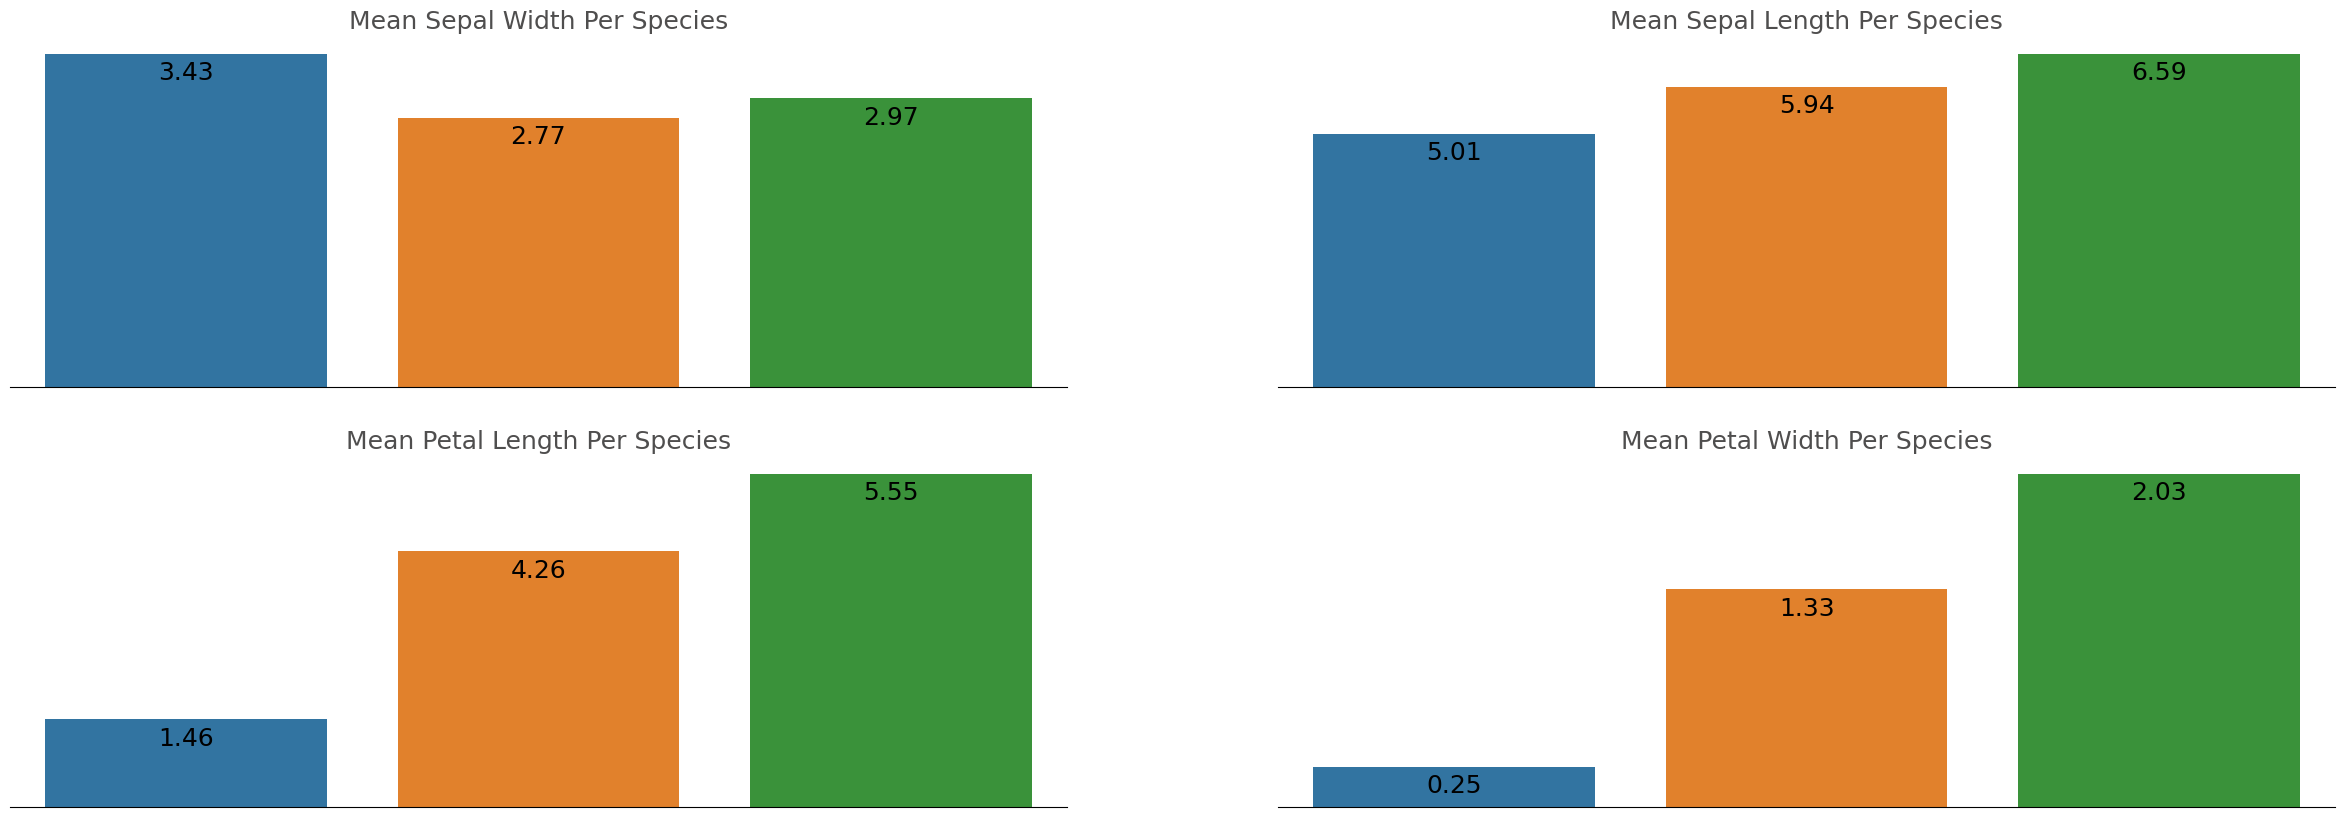

In [6]:

# Set the figure size
plt.figure(figsize=(30, 10))

# Plot for sepal width
plt.subplot(2, 2, 1)
ax1 = sns.barplot(x="species", y="sepal_width", data=df,
                  errorbar=None)
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([])
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Sepal Width Per Species', size=18, color='#4f4e4e')
bar_label(ax1)

# Plot for sepal length
plt.subplot(2, 2, 2)
ax2 = sns.barplot(x="species", y="sepal_length", data=df,
                  errorbar=None)
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([])
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Sepal Length Per Species', size=18, color='#4f4e4e')
bar_label(ax2)

# Plot for petal length
plt.subplot(2, 2, 3)
ax3 = sns.barplot(x="species", y="petal_length", data=df,
                  errorbar=None)
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([])
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Petal Length Per Species', size=18, color='#4f4e4e')
bar_label(ax3)

# Plot for petal width
plt.subplot(2, 2, 4)
ax4 = sns.barplot(x="species", y="petal_width", data=df,
                  errorbar=None)
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([])
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Petal Width Per Species', size=18, color='#4f4e4e')
bar_label(ax4)

sns.despine(left=True) # Using the despine function to remove the axis lines on the left hand side


# Show plot
plt.show()

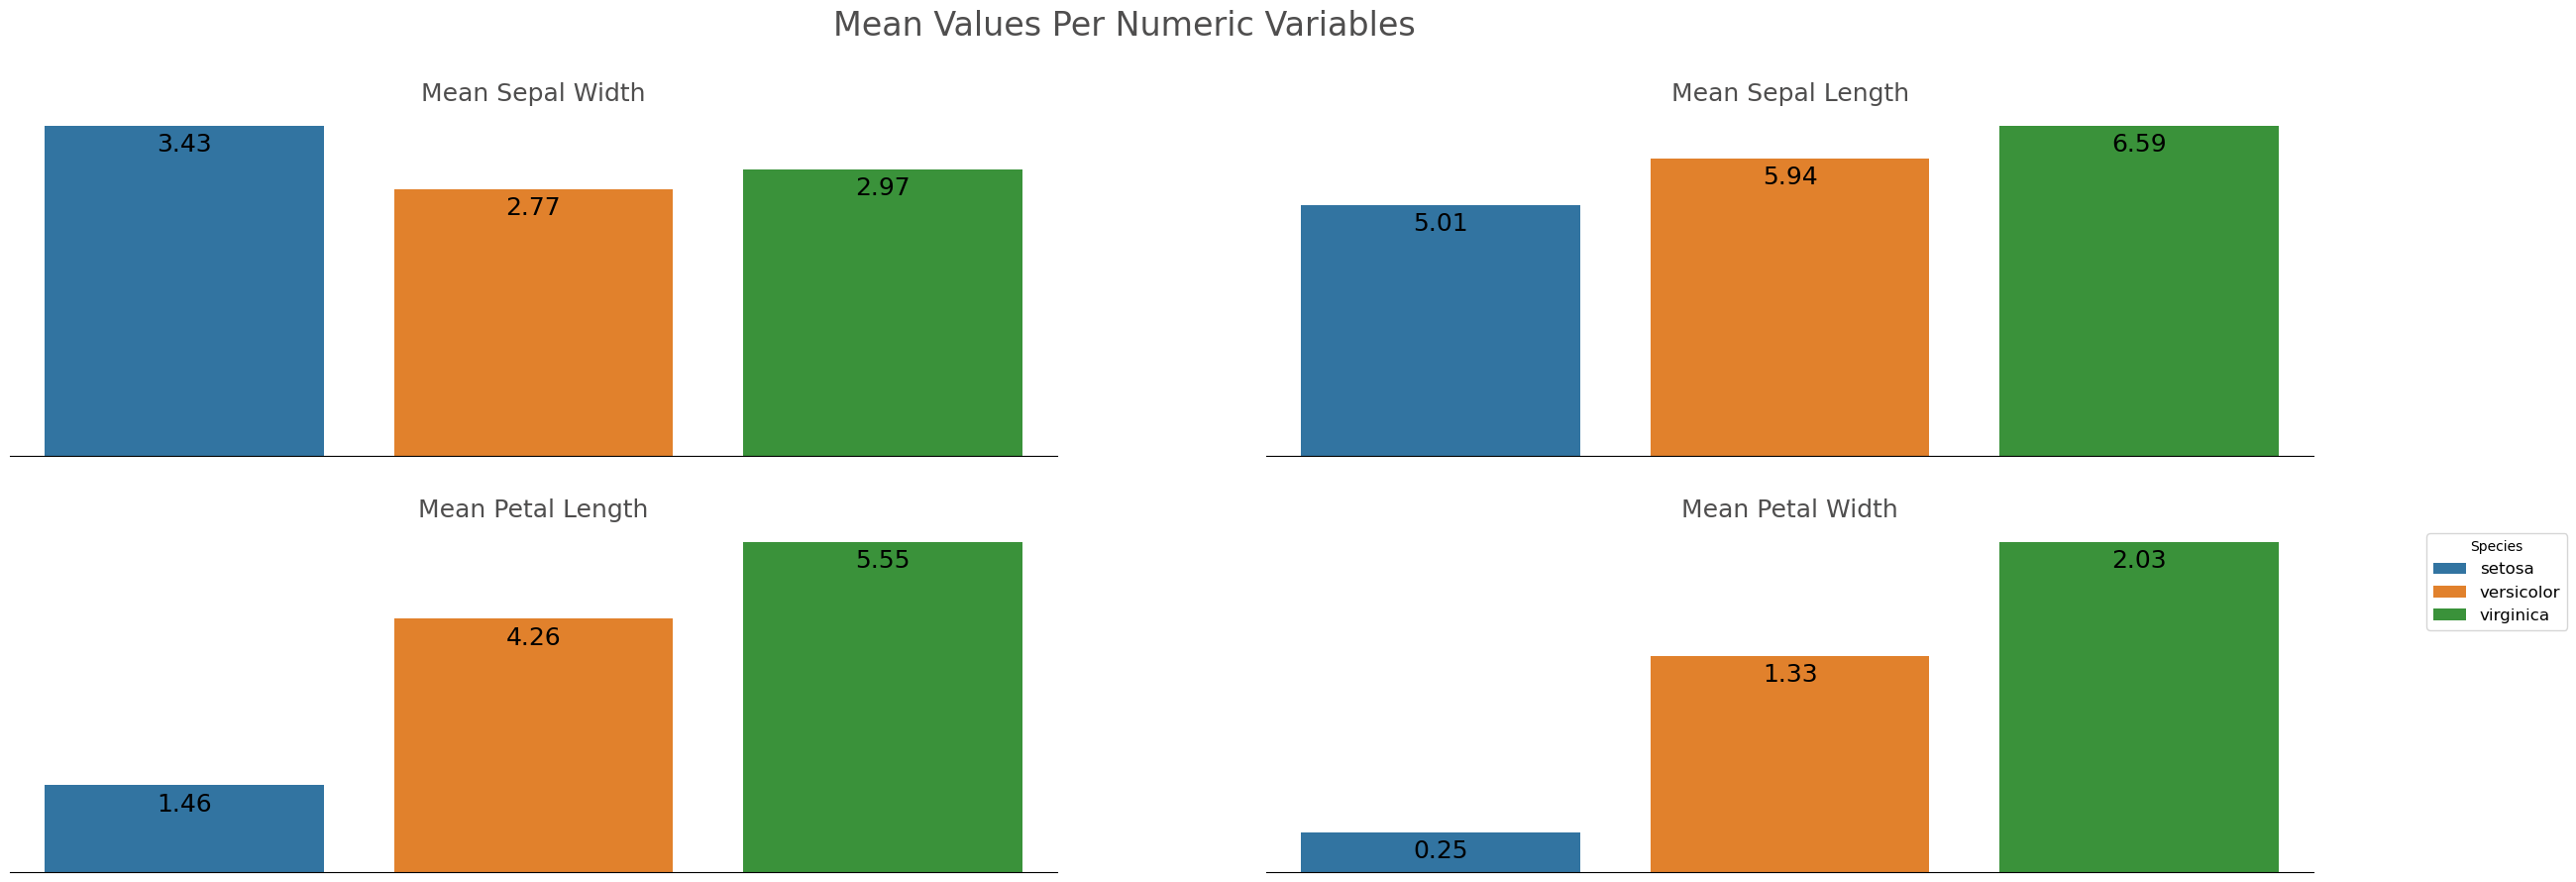

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(30, 10))


# Plot for sepal width
plt.subplot(2, 2, 1)
ax1 = sns.barplot(x="species", y="sepal_width", data=df,
                  errorbar=None, hue="species",dodge=False)
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([])
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Sepal Width', size=18, color='#4f4e4e')
bar_label(ax1)
ax1.legend_.remove() # Remove individual legends

# Plot for sepal length
plt.subplot(2, 2, 2)
ax2 = sns.barplot(x="species", y="sepal_length", data=df,
                  errorbar=None, hue="species", dodge=False)
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([])
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Sepal Length', size=18, color='#4f4e4e')
bar_label(ax2)
ax2.legend_.remove() # Remove individual legends

# Plot for petal length
plt.subplot(2, 2, 3)
ax3 = sns.barplot(x="species", y="petal_length", data=df,
                  errorbar=None, hue="species", dodge=False)
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([])
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Petal Length', size=18, color='#4f4e4e')
bar_label(ax3)
ax3.legend_.remove() # Remove individual legends

# Plot for petal width
plt.subplot(2, 2, 4)
ax4 = sns.barplot(x="species", y="petal_width", data=df,
                  errorbar=None, hue="species", dodge=False)
plt.yticks([]) # Setting the tick marks to be blank by assigning an empty list.
plt.xticks([])
plt.xlabel('') # Setting the x-axis label to be blank
plt.ylabel('') # Setting the y-axis label to be blank
plt.title('Mean Petal Width', size=18, color='#4f4e4e')
bar_label(ax4)
ax4.legend(title="Species", loc='upper right', bbox_to_anchor=(1.25, 1), fontsize='large')
sns.despine(left=True) # Using the despine function to remove the axis lines on the left hand side

plt.suptitle('Mean Values Per Numeric Variables', size=24, color='#4f4e4e')
# Show plot
plt.show()
